In [1]:
# 1. Geometric Transformations (Translation, Rotation, Scaling)

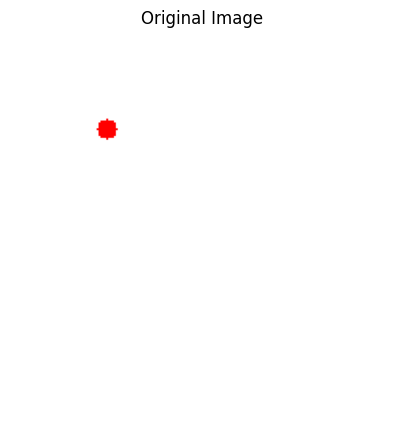

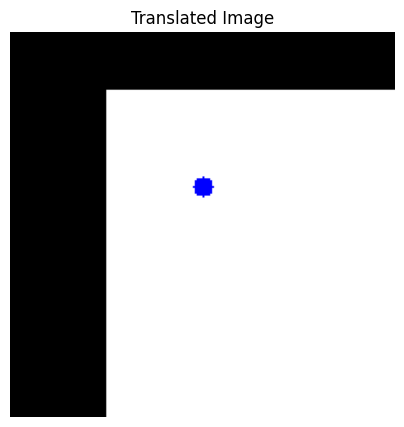

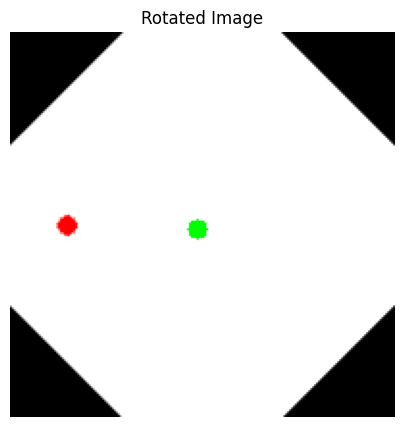

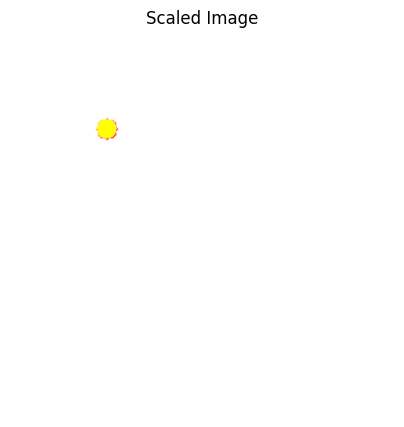

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Create a blank image for demonstration (200x200 pixels with a white background)
image = np.ones((200, 200, 3), dtype=np.uint8) * 255

# Draw a red point at the original coordinates (50, 50)
cv2.circle(image, (50, 50), 5, (0, 0, 255), -1)

# -------------------------
# 1. Translation Example
# -------------------------
# Translation Matrix: move 50 pixels right and 30 pixels down
tx, ty = 50, 30
translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
# Apply translation
translated_image = cv2.warpAffine(image, translation_matrix, (image.shape[1], image.shape[0]))
# Draw a blue point at the new translated coordinates
cv2.circle(translated_image, (50 + tx, 50 + ty), 5, (255, 0, 0), -1)

# -------------------------
# 2. Rotation Example
# -------------------------
# Rotation Matrix: Rotate 45 degrees around the center of the image
center = (image.shape[1] // 2, image.shape[0] // 2)
angle = 45
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
# Apply rotation
rotated_image = cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]))
# Draw a green point at approximately the rotated coordinates
cv2.circle(rotated_image, (center[0] - 3, center[1] + 2), 5, (0, 255, 0), -1)

# -------------------------
# 3. Scaling Example
# -------------------------
# Scaling: Resize the image to double its original size
sx, sy = 2, 2
scaled_image = cv2.resize(image, None, fx=sx, fy=sy)
# Draw a yellow point at the new scaled coordinates
cv2.circle(scaled_image, (50 * sx, 50 * sy), 10, (0, 255, 255), -1)

# -------------------------
# Display Results
# -------------------------

# Helper function to display images in Colab
def show_image(title, img, cmap=None):
    plt.figure(figsize=(5, 5))
    if cmap:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cmap=cmap)
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Show all images
show_image('Original Image', image)
show_image('Translated Image', translated_image)
show_image('Rotated Image', rotated_image)
show_image('Scaled Image', scaled_image)


In [ ]:
# 2. Affine Transformations

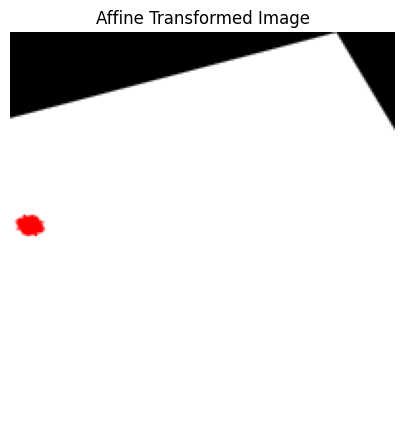

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Create a blank image for demonstration (200x200 pixels with a white background)
image = np.ones((200, 200, 3), dtype=np.uint8) * 255

# Draw a red point at the original coordinates (50, 50)
cv2.circle(image, (50, 50), 5, (0, 0, 255), -1)

# Define source and destination points for the affine transformation
pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
pts2 = np.float32([[10, 100], [200, 50], [100, 250]])

# Calculate the Affine Transformation Matrix
affine_matrix = cv2.getAffineTransform(pts1, pts2)

# Apply the affine transformation
affine_transformed_image = cv2.warpAffine(image, affine_matrix, (image.shape[1], image.shape[0]))

# Function to display images using Matplotlib
def show_image(title, img):
    plt.figure(figsize=(5, 5))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Display the transformed image
show_image('Affine Transformed Image', affine_transformed_image)


In [ ]:
# 3. Projective Transformations

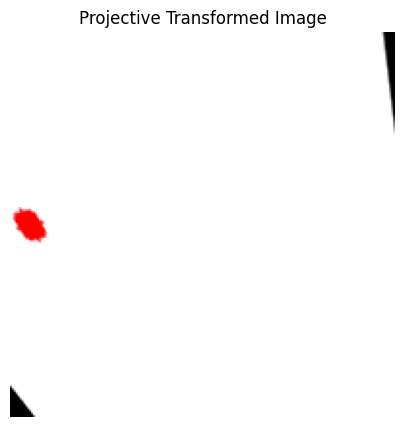

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Create a blank image for demonstration (200x200 pixels with a white background)
image = np.ones((200, 200, 3), dtype=np.uint8) * 255

# Draw a red point at the original coordinates (50, 50)
cv2.circle(image, (50, 50), 5, (0, 0, 255), -1)

# Define source and destination points for the homography transformation
pts1 = np.float32([[50, 50], [200, 50], [50, 200], [200, 200]])
pts2 = np.float32([[10, 100], [200, 50], [100, 250], [220, 220]])

# Calculate the Homography matrix
homography_matrix, _ = cv2.findHomography(pts1, pts2)

# Apply Homography
projective_transformed_image = cv2.warpPerspective(image, homography_matrix, (image.shape[1], image.shape[0]))

# Function to display images using Matplotlib
def show_image(title, img):
    plt.figure(figsize=(5, 5))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Display the transformed image
show_image('Projective Transformed Image', projective_transformed_image)


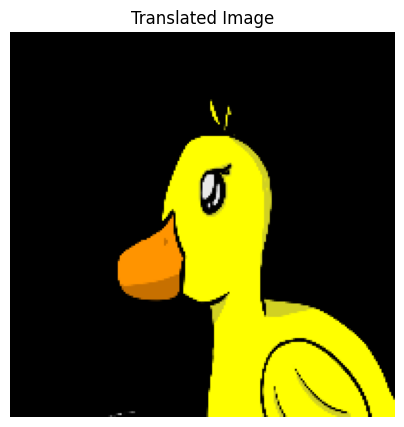

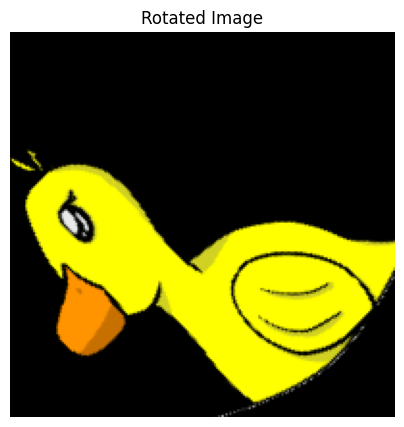

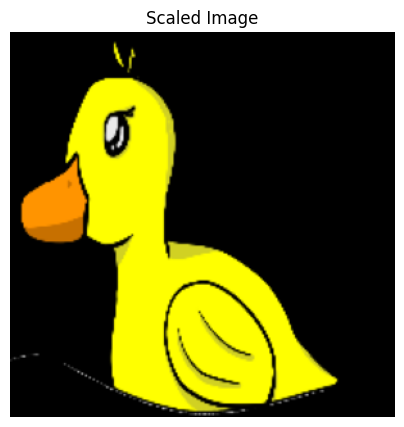

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the duck image
image = cv2.imread('duck.png')

if image is None:
    raise FileNotFoundError("The file 'duck.png' was not found. Please upload it to the Colab environment.")

# Resize the image for demonstration purposes (optional)
image = cv2.resize(image, (200, 200))

# Function to display images using Matplotlib
def show_image(title, img):
    plt.figure(figsize=(5, 5))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# -------------------------
# 1. Translation Transformation
# -------------------------
# Define translation matrix (move 50 pixels right, 30 pixels down)
tx, ty = 50, 30
translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])

# Apply translation
translated_image = cv2.warpAffine(image, translation_matrix, (image.shape[1], image.shape[0]))

# Display the translated image
show_image('Translated Image', translated_image)

# -------------------------
# 2. Rotation Transformation
# -------------------------
# Define the rotation matrix (rotate 45 degrees around the center)
center = (image.shape[1] // 2, image.shape[0] // 2)
angle = 45
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)

# Apply rotation
rotated_image = cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]))

# Display the rotated image
show_image('Rotated Image', rotated_image)

# -------------------------
# 3. Scaling Transformation
# -------------------------
# Scaling factor: scale by 1.5 (1.5 times the size)
sx, sy = 1.5, 1.5
scaled_image = cv2.resize(image, None, fx=sx, fy=sy)

# Display the scaled image
show_image('Scaled Image', scaled_image)


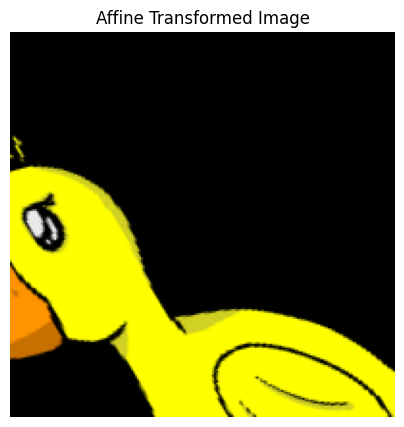

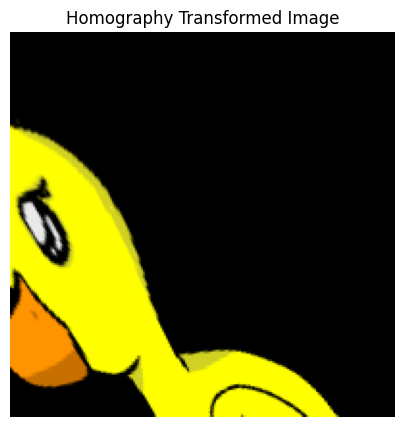

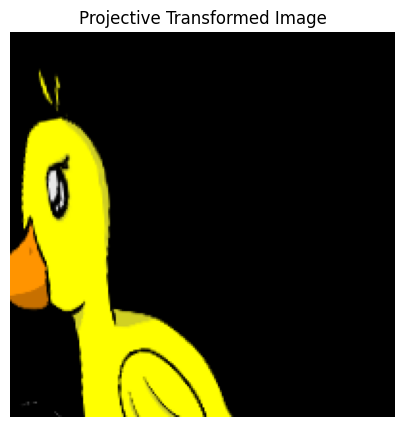

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the duck image
image = cv2.imread('duck.png')

if image is None:
    raise FileNotFoundError("The file 'duck.png' was not found. Please upload it to the Colab environment.")

# Resize the image for demonstration purposes (optional)
image = cv2.resize(image, (200, 200))

# Function to display images using Matplotlib
def show_image(title, img):
    plt.figure(figsize=(5, 5))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# -------------------------
# 1. Affine Transformation
# -------------------------

# Define source and destination points for the affine transformation
pts1_affine = np.float32([[50, 50], [200, 50], [50, 200]])
pts2_affine = np.float32([[10, 100], [200, 50], [100, 250]])

# Calculate the Affine Transformation Matrix
affine_matrix = cv2.getAffineTransform(pts1_affine, pts2_affine)

# Apply the affine transformation
affine_transformed_image = cv2.warpAffine(image, affine_matrix, (image.shape[1], image.shape[0]))

# Display the affine transformed image
show_image('Affine Transformed Image', affine_transformed_image)

# -------------------------
# 2. Homography Transformation
# -------------------------

# Define source and destination points for the homography transformation
pts1_homography = np.float32([[50, 50], [200, 50], [50, 200], [200, 200]])
pts2_homography = np.float32([[10, 100], [200, 50], [100, 250], [220, 220]])

# Calculate the Homography matrix
homography_matrix, _ = cv2.findHomography(pts1_homography, pts2_homography)

# Apply the homography transformation
homography_transformed_image = cv2.warpPerspective(image, homography_matrix, (image.shape[1], image.shape[0]))

# Display the homography transformed image
show_image('Homography Transformed Image', homography_transformed_image)

# -------------------------
# 3. Projective Transformation
# -------------------------

# Define source and destination points for the projective transformation
pts1_projective = np.float32([[50, 50], [200, 50], [50, 200], [200, 200]])
pts2_projective = np.float32([[20, 80], [180, 60], [40, 220], [160, 240]])

# Calculate the projective transformation matrix
projective_matrix, _ = cv2.findHomography(pts1_projective, pts2_projective)

# Apply the projective transformation
projective_transformed_image = cv2.warpPerspective(image, projective_matrix, (image.shape[1], image.shape[0]))

# Display the projective transformed image
show_image('Projective Transformed Image', projective_transformed_image)
